In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from PreProcess import preprocess
from sklearn.model_selection import train_test_split

In [36]:
df = preprocess("housing_data.csv", "MEDV", ["RM", "AGE", "DIS", "LSTAT"])

In [37]:
def predict(X, m, b):
    return m * X + b

def compute_error(Y, Y_hat):
    return np.sqrt(np.sum((Y - Y_hat) ** 2))

def gradients(X, Y, Y_hat):
    error = Y - Y_hat
    grad_m = -2 * np.sum(X * error) 
    grad_b = -2 * np.sum(error)      
    return grad_m, grad_b

def gradient_descent(X, Y, m, b, learning_rate, iterations):
    for i in range(iterations):
        Y_hat = predict(X, m, b)
        grad_m, grad_b = gradients(X, Y, Y_hat)
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
#         if i % 100 == 0:
#             print(f"Iteration {i}: Error = {compute_error(Y, Y_hat)}")
    return m, b

In [57]:

def calculate_all_predictions(df, target_column, features, learning_rate, iterations):
    X = df[features]
    Y = df[target_column]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    errors = {"train": {}, "test": {}, "average": {"train": 0, "test": 0}}
    slopes_biases = {"slopes": {}, "biases": {}}
    predictions_matrix_train = []
    predictions_matrix_test = []

    for feature in features:
        X_train_feature = X_train[feature].values
        X_test_feature = X_test[feature].values
        m, b = 0.0, 0.0

        m_final, b_final = gradient_descent(X_train_feature, Y_train.values, m, b, learning_rate, iterations)

        slopes_biases["slopes"][feature] = m_final
        slopes_biases["biases"][feature] = b_final
        Y_train_pred = predict(X_train_feature, m_final, b_final)
        Y_test_pred = predict(X_test_feature, m_final, b_final)

        predictions_matrix_train.append(Y_train_pred)
        predictions_matrix_test.append(Y_test_pred)

        errors["train"][feature] = compute_error(Y_train.values, Y_train_pred)
        errors["test"][feature] = compute_error(Y_test.values, Y_test_pred)

    average_train_pred = np.mean(predictions_matrix_train, axis=0)
    average_test_pred = np.mean(predictions_matrix_test, axis=0)

    errors["average"]["train"] = compute_error(Y_train.values, average_train_pred)
    errors["average"]["test"] = compute_error(Y_test.values, average_test_pred)

    return errors, slopes_biases

In [58]:
errors,slopes_biases = calculate_all_predictions(df, 'MEDV', ["RM", "AGE", "DIS", "LSTAT"], 0.001, 1000)

In [52]:
def generate_graphical_table(errors):
    data = []
    for feature, train_error in errors["train"].items():
        test_error = errors["test"][feature]
        data.append([feature, train_error, test_error])
    data.append(["Average Prediction", errors["average"]["train"], errors["average"]["test"]])
    df = pd.DataFrame(data, columns=["Feature", "Train Error (Norm-2)", "Test Error (Norm-2)"])
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    plt.show()

In [62]:
def generate_graphical_table_slopes_biases(slopes_biases):
    features = list(slopes_biases["slopes"].keys())
    slopes = [slopes_biases["slopes"][feature] for feature in features]
    biases = [slopes_biases["biases"][feature] for feature in features]
    data = list(zip(features, slopes, biases))
    df = pd.DataFrame(data, columns=["Feature", "Slope", "Bias"])
    fig, ax = plt.subplots(figsize=(2,2))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    plt.show()

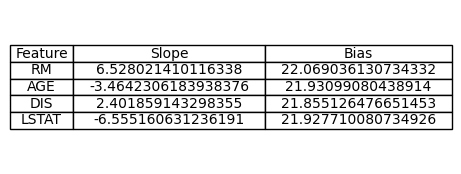

In [63]:
generate_graphical_table_slopes_biases(slopes_biases)

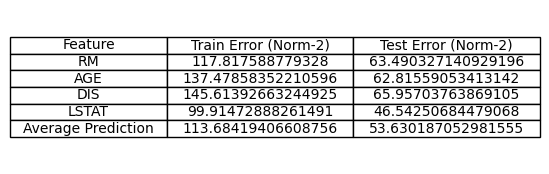

In [53]:
generate_graphical_table(errors)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MEDV']), df['MEDV'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error_norm2 = compute_error(y_test, y_pred)
print(f"Mean Squared Error: {error_norm2}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 46.174958773873314
Coefficients: [ 2.94198891 -0.48296217 -0.96901766 -5.27106164]
Intercept: 22.02022636917157
